# Analyse Univariée

In [118]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as  sns
sns.set() 
# sns.set_theme(style='whitegrid')

In [119]:
operations_data = pd.read_csv('operations_data_enrichies.csv', parse_dates=[1])
operations_stats = pd.DataFrame()

def add_stats(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()]}, index=[index_label])])
    return df

# 1 Tendances Centrales : mean, mode, median

## 1.1 Debit

min      -500.000000
mean      -27.672274
median     -9.620000
mode       -5.000000
max        -0.230000
Name: Debit, dtype: float64


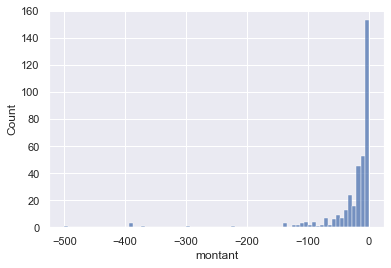

In [120]:
debit=operations_data[operations_data['montant']<0]['montant']

operations_stats = add_stats('Debit', operations_stats, debit)
print(operations_stats.loc['Debit'])
# print('Debit:', debit.max(), debit.mean(), debit.median(), debit.mode()[0], debit.min())

h=sns.histplot(data=(debit), log_scale=False)

## 1.2 Credit

min          4.6500
mean       365.1752
median     150.0000
mode       150.0000
max       1207.4500
Name: Credit, dtype: float64


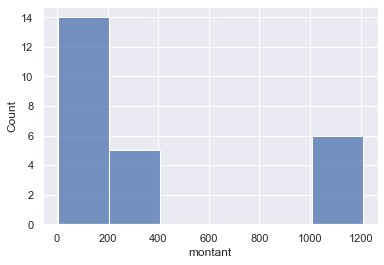

In [121]:
credit=operations_data[operations_data['montant']>0]['montant']

operations_stats = add_stats('Credit', operations_stats, credit)
print(operations_stats.loc['Credit'])
# print('Credit:', credit.min(), credit.mean(), credit.median(), credit.mode()[0], credit.max())

h=sns.histplot(data=credit, log_scale=False)

## 1.3 Montant (Credit & Debit)

min       -500.000000
mean        -2.489744
median      -8.720000
mode        -5.000000
max       1207.450000
Name: Montant, dtype: float64


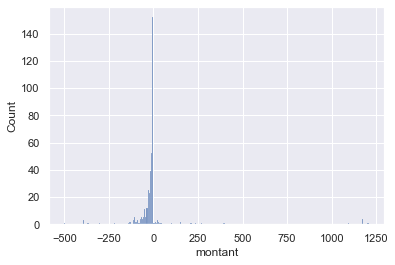

In [122]:
montant=operations_data['montant']

operations_stats = add_stats('Montant', operations_stats, montant)
print(operations_stats.loc['Montant'])
# print('Montant:', montant.min(), montant.mean(), montant.median(), montant.mode()[0], montant.max())

h=sns.histplot(data=montant, log_scale=False)

## 1.4 Solde

min       -296.080000
mean       530.737436
median     429.400000
mode       357.400000
max       1447.710000
Name: Solde, dtype: float64


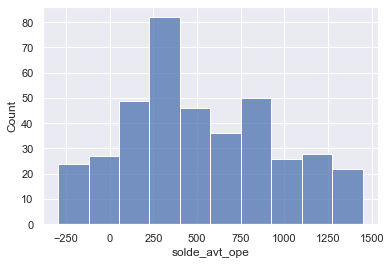

In [123]:
solde=operations_data['solde_avt_ope']

operations_stats = add_stats('Solde', operations_stats, solde)
print(operations_stats.loc['Solde'])
# print('Solde:', solde.min(), solde.mean(), solde.median(), solde.mode()[0], solde.max())

h=sns.histplot(data=solde, log_scale=False)

            min        mean  median   mode      max
Debit   -500.00  -27.672274   -9.62   -5.0    -0.23
Credit     4.65  365.175200  150.00  150.0  1207.45
Montant -500.00   -2.489744   -8.72   -5.0  1207.45
Solde   -296.08  530.737436  429.40  357.4  1447.71


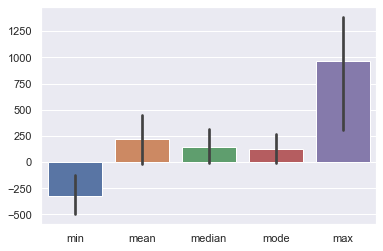

In [124]:
print(operations_stats)
h=sns.barplot(data=operations_stats)

## 1.5 Dépenses (credit) Par Catégories

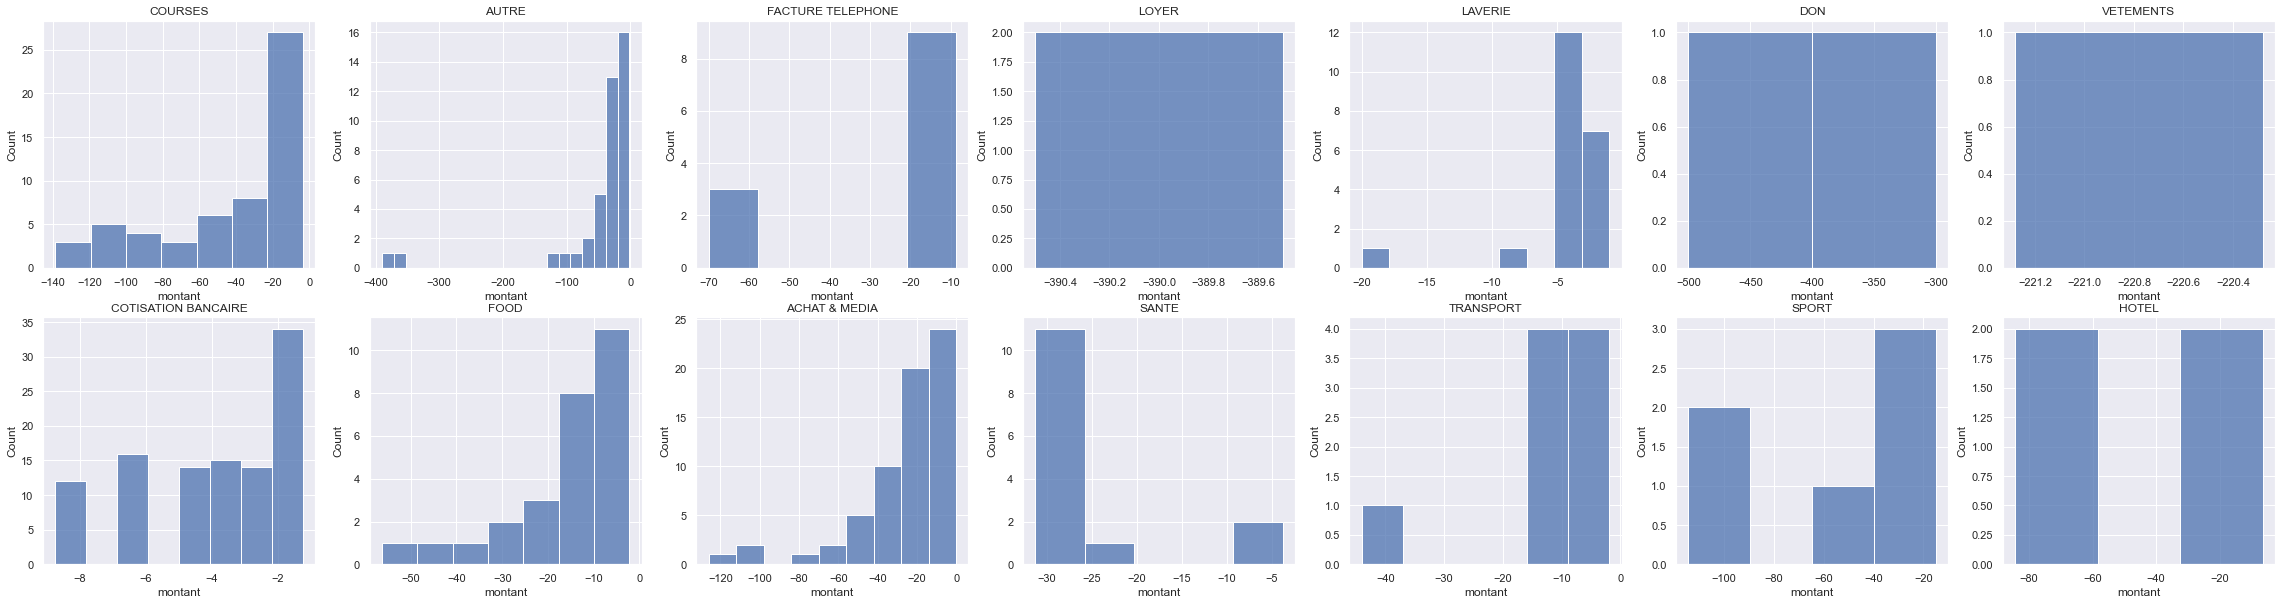

In [125]:
categories = operations_data['categ'].unique()
nb_categories = len(categories)

fig, axes = plt.subplots(2, nb_categories//2, figsize=(40,10), sharex=False, sharey=False)

for j in range(0, nb_categories//2):
    for i in range(2):
        index=j*2+i
        sns.histplot(data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categories[index])]['montant'], ax=axes[i,j])
        axes[i,j].set_title(categories[index])

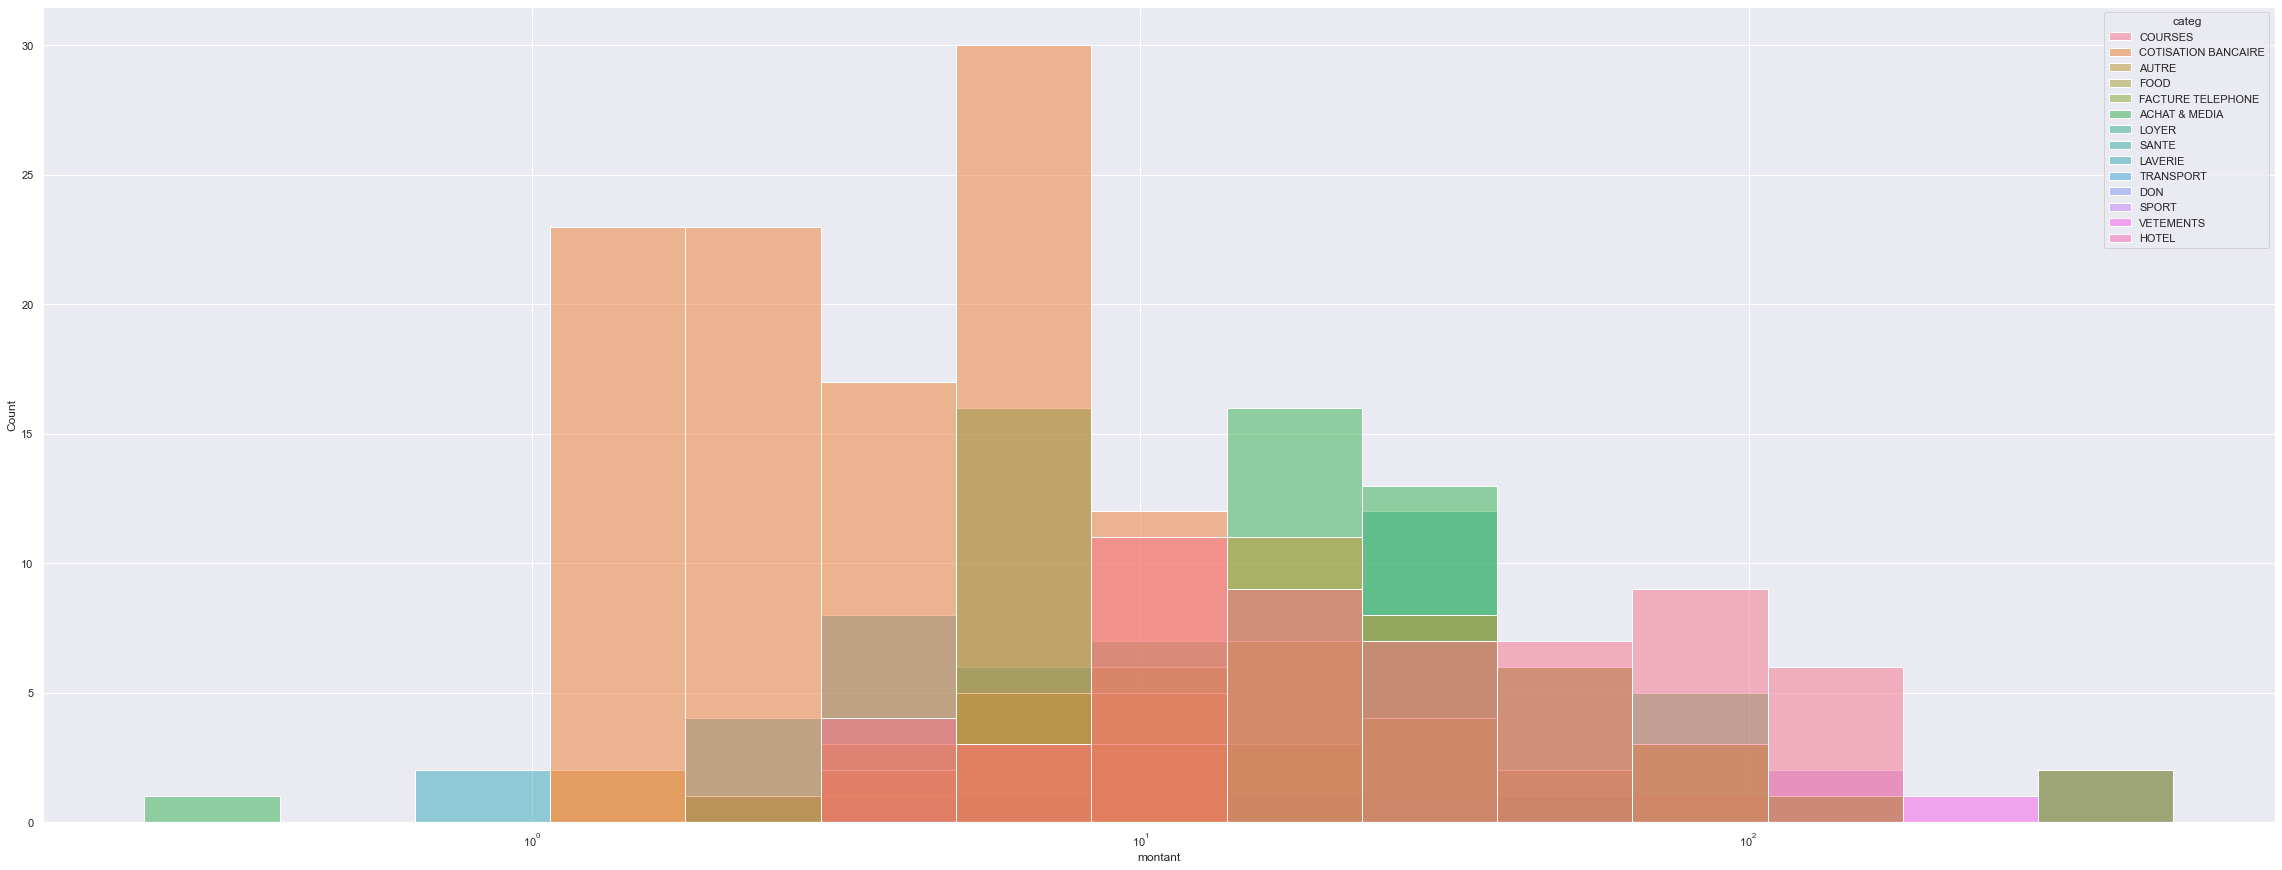

In [126]:
fig, axes = plt.subplots(figsize=(40,15), sharex=False, sharey=False)

ax= sns.histplot(hue=operations_data['categ'], x=np.abs(operations_data[(operations_data['montant']<0)]['montant']), ax=axes, log_scale=True)

# 2 Mesures de dispersion : var, std, cv

In [221]:
def add_stats2(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()],'var':[stat.var(ddof=0)],'std':[stat.std(ddof=0)],'cv':[np.abs(stat.std(ddof=0)/stat.mean()*100)], 'count':[stat.count()]}, index=[index_label])])

    df2=df['count']*df['std']*df['cv']
    df['count*std*cv(/)']=df2/df2.max()*100
    return df

In [222]:
categories = operations_data['categ'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,count,count*std*cv(/)
COURSES,-138.65,-42.873571,-23.565,-138.65,-3.61,1578.937973,39.735852,92.681461,56,37.357890
COTISATION BANCAIRE,-8.75,-3.902762,-3.500,-6.00,-1.25,5.450450,2.334620,59.819688,105,2.656248
AUTRE,-390.00,-47.547073,-22.500,-20.00,-1.28,6402.078977,80.012993,168.281636,41,100.000000
FOOD,-56.28,-16.207037,-13.700,-56.28,-2.20,167.650488,12.947992,79.891171,27,5.059223
FACTURE TELEPHONE,-69.99,-26.559167,-13.035,-10.99,-8.72,632.287808,25.145334,94.676667,12,5.174883
ACHAT & MEDIA,-125.94,-25.739692,-15.980,-5.99,-0.23,638.620523,25.270942,98.178882,65,29.212706
LOYER,-390.00,-390.000000,-390.000,-390.00,-390.00,0.000000,0.000000,0.000000,2,0.000000
SANTE,-31.25,-27.108571,-31.250,-31.25,-3.82,81.559812,9.031047,33.314360,14,0.762986
LAVERIE,-20.00,-4.476190,-4.000,-4.00,-1.00,14.630385,3.824969,85.451428,21,1.243327
TRANSPORT,-44.00,-12.055556,-10.000,-10.00,-1.90,144.375802,12.015648,99.668972,9,1.952399


In [223]:
categories = operations_data['type'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['type']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,count,count*std*cv(/)
CARTE,-220.78,-28.109560,-15.255,-5.99,-1.00,1146.085822,33.853889,120.435499,182,39.993969
PRELEVEMENT,-125.94,-24.905867,-15.980,-31.25,-0.23,539.776920,23.233100,93.283643,75,8.760602
AUTRE,-390.00,-8.042169,-2.250,-1.50,-1.25,1797.773824,42.400163,527.223001,83,100.000000
VIREMENT,-500.00,-114.950000,-6.000,-6.00,-5.00,27293.947500,165.208800,143.722314,20,25.594544
RETRAIT,-70.00,-30.000000,-20.000,-20.00,-20.00,400.000000,20.000000,66.666667,5,0.359310


In [231]:
categories = operations_data['weekend'].unique()
categories_stats = pd.DataFrame()

for categorie in categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['weekend']==categorie)]['montant']    
    categories_stats = add_stats2(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,count,count*std*cv(/)
False,-500.0,-26.461102,-9.59,-5.0,-0.23,2765.671663,52.589654,198.743249,363,100.000000
True,-370.0,-247.500000,-247.50,-370.0,-125.00,15006.250000,122.500000,49.494949,2,0.319615


# Mesures de Forme : Skewness empirique (skew) & Kurtosis empirique (urtosis)

In [224]:
def add_stats3(index_label, df, stat):
    if index_label in df.index:
        df.drop(index_label, inplace=True)
    df= pd.concat([df,pd.DataFrame(data={'min':[stat.min()],'mean':[stat.mean()],'median':[stat.median()],'mode':[stat.mode()[0]],'max':[stat.max()],'var':[stat.var(ddof=0)],'std':[stat.std(ddof=0)],'cv':[np.abs(stat.std(ddof=0)/stat.mean()*100)],'skew':[stat.skew()],'kurtosis':[stat.kurtosis()]}, index=[index_label])])
    return df

In [225]:
categories = operations_data['categ'].unique()
categories_stats = pd.DataFrame()

for categorie in  categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant']    
    categories_stats = add_stats3(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,skew,kurtosis
COURSES,-138.65,-42.873571,-23.565,-138.65,-3.61,1578.937973,39.735852,92.681461,-1.012570,-0.269186
COTISATION BANCAIRE,-8.75,-3.902762,-3.500,-6.00,-1.25,5.450450,2.334620,59.819688,-0.704956,-0.611744
AUTRE,-390.00,-47.547073,-22.500,-20.00,-1.28,6402.078977,80.012993,168.281636,-3.624234,13.391131
FOOD,-56.28,-16.207037,-13.700,-56.28,-2.20,167.650488,12.947992,79.891171,-1.635450,2.708172
FACTURE TELEPHONE,-69.99,-26.559167,-13.035,-10.99,-8.72,632.287808,25.145334,94.676667,-1.304581,-0.350100
ACHAT & MEDIA,-125.94,-25.739692,-15.980,-5.99,-0.23,638.620523,25.270942,98.178882,-2.060335,4.708441
LOYER,-390.00,-390.000000,-390.000,-390.00,-390.00,0.000000,0.000000,0.000000,NaN,NaN
SANTE,-31.25,-27.108571,-31.250,-31.25,-3.82,81.559812,9.031047,33.314360,2.185942,3.496313
LAVERIE,-20.00,-4.476190,-4.000,-4.00,-1.00,14.630385,3.824969,85.451428,-3.338028,13.285776
TRANSPORT,-44.00,-12.055556,-10.000,-10.00,-1.90,144.375802,12.015648,99.668972,-2.356872,6.209348


In [226]:
categories = operations_data['type'].unique()
categories_stats = pd.DataFrame()

for categorie in  categories:
    data=operations_data[(operations_data['montant']<0) & (operations_data['type']==categorie)]['montant']    
    categories_stats = add_stats3(categorie, categories_stats, data)

categories_stats

,min,mean,median,mode,max,var,std,cv,skew,kurtosis
CARTE,-220.78,-28.109560,-15.255,-5.99,-1.00,1146.085822,33.853889,120.435499,-2.309641,6.667331
PRELEVEMENT,-125.94,-24.905867,-15.980,-31.25,-0.23,539.776920,23.233100,93.283643,-2.148510,5.325016
AUTRE,-390.00,-8.042169,-2.250,-1.50,-1.25,1797.773824,42.400163,527.223001,-8.973791,81.231106
VIREMENT,-500.00,-114.950000,-6.000,-6.00,-5.00,27293.947500,165.208800,143.722314,-1.270366,0.009775
RETRAIT,-70.00,-30.000000,-20.000,-20.00,-20.00,400.000000,20.000000,66.666667,-2.236068,5.000000


# Mesures de Concentration

## Lorenz

In [227]:
def lorenz(data):
    lrz = np.cumsum(np.sort(data)) / data.sum()
    lrz = np.append([0],lrz) # La courbe de Lorenz commence à 0
    return lrz

def lorenz_plot(data):
    n = len(data)  
    lrz = lorenz(data)  

    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.plot(xaxis,lrz,drawstyle='steps-post')
    plt.show()

## Gini

In [228]:
def gini(data):
    n = len(data) 
    lrz = lorenz(data)     
    AUC = (lrz.sum() -lrz[-1]/2 -lrz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    return gini


## Toutes dépenses

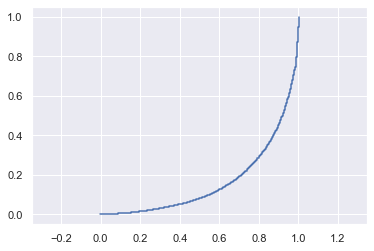

Gini= 0.6709062919564099


In [229]:
depenses = -operations_data[operations_data['montant']<0]['montant']
lorenz_plot(depenses)
print('Gini=', gini(depenses))

## Dépenses par Catégories

                        categ  montant    lorenz
0.000000              LAVERIE    94.00  0.009307
0.071429            TRANSPORT   108.50  0.020049
0.142857                HOTEL   164.86  0.036371
0.214286            VETEMENTS   220.78  0.058229
0.285714    FACTURE TELEPHONE   318.71  0.089784
0.357143                SPORT   363.20  0.125743
0.428571                SANTE   379.52  0.163318
0.500000  COTISATION BANCAIRE   409.79  0.203889
0.571429                 FOOD   437.59  0.247213
0.642857                LOYER   780.00  0.324438
0.714286                  DON   800.00  0.403643
0.785714        ACHAT & MEDIA  1673.08  0.569288
0.857143                AUTRE  1949.43  0.762294
0.928571              COURSES  2400.92  1.000000


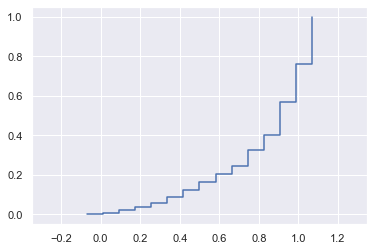

Gini= 0.4980618833859999


In [230]:
categories = operations_data['categ'].unique()
depenses_categories =pd.Series(data= [-operations_data[(operations_data['montant']<0) & (operations_data['categ']==categorie)]['montant'].sum() for categorie in categories ], index=categories).sort_values()

print(pd.DataFrame(data={'categ':depenses_categories.index, 'montant':depenses_categories.values,'lorenz': lorenz(depenses_categories)[1:]}, index=[i/len(categories) for i in range(len(categories))]))

lorenz_plot(depenses_categories)
print('Gini=', gini(depenses_categories))